###                                                             IN THE NAME  OF GOD
#                                          Regression Project
## writer : k-Abedi
## 


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('cardata.csv')
data

,fCar_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### Car_name : Name of the cars
#### Year : Year of the car when it was bought
#### Selling_Price : Price at which car is being sold
#### Kms_Driven : Number of kilometers the car is driven
#### Fuel_Type : Fuel type of car (petrol / diesel / CNG)
#### Seller_Type : Tells a Seller is Individual or a Dealer
#### Transmission : Gear transmission of the car (Automatic / Manual)
#### Owner : Number of previous owners of the car
# 

In [3]:
# finding the name of most expensive brand of car in Present_Price 
df1 = pd.DataFrame(data)
df1.loc[86, : ]

fCar_Name        land cruiser
Year                     2010
Selling_Price            35.0
Present_Price            92.6
Kms_Driven              78000
Fuel_Type              Diesel
Seller_Type            Dealer
Transmission           Manual
Owner                       0
Name: 86, dtype: object

In [4]:
#  adding age column, until 2020
Age = 2020-df1.Year
df1.insert(2,"Age",Age)
df1

,fCar_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,4,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,3,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
# drop name_car and Year columns
df = pd.DataFrame(df1,columns = ['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Selling_Price'])
df                  

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,6,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,7,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,3,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,9,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,6,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...
296,4,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,5,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,11,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,3,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [6]:
# change string columns  to number
T = {'Manual':1,'Automatic':0}
df.Transmission = [T[item] for item in df.Transmission]
S = {'Dealer':1 , 'Individual':0}
df.Seller_Type = [S[item] for item in df.Seller_Type]
F = {'Petrol':1, 'Diesel':2, 'CNG':3}
df.Fuel_Type = [F[item] for item in df.Fuel_Type]
df


,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,6,5.59,27000,1,1,1,0,3.35
1,7,9.54,43000,2,1,1,0,4.75
2,3,9.85,6900,1,1,1,0,7.25
3,9,4.15,5200,1,1,1,0,2.85
4,6,6.87,42450,2,1,1,0,4.60
...,...,...,...,...,...,...,...,...
296,4,11.60,33988,2,1,1,0,9.50
297,5,5.90,60000,1,1,1,0,4.00
298,11,11.00,87934,1,1,1,0,3.35
299,3,12.50,9000,2,1,1,0,11.50


In [7]:
df.describe()

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,6.372093,7.628472,36947.205980,1.212625,0.647841,0.867110,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,5.082812
min,2.000000,0.320000,500.000000,1.000000,0.000000,0.000000,0.000000,0.100000
25%,4.000000,1.200000,15000.000000,1.000000,0.000000,1.000000,0.000000,0.900000
50%,6.000000,6.400000,32000.000000,1.000000,1.000000,1.000000,0.000000,3.600000
75%,8.000000,9.900000,48767.000000,1.000000,1.000000,1.000000,0.000000,6.000000
max,17.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,3.000000,35.000000


# 

## noise detection plots




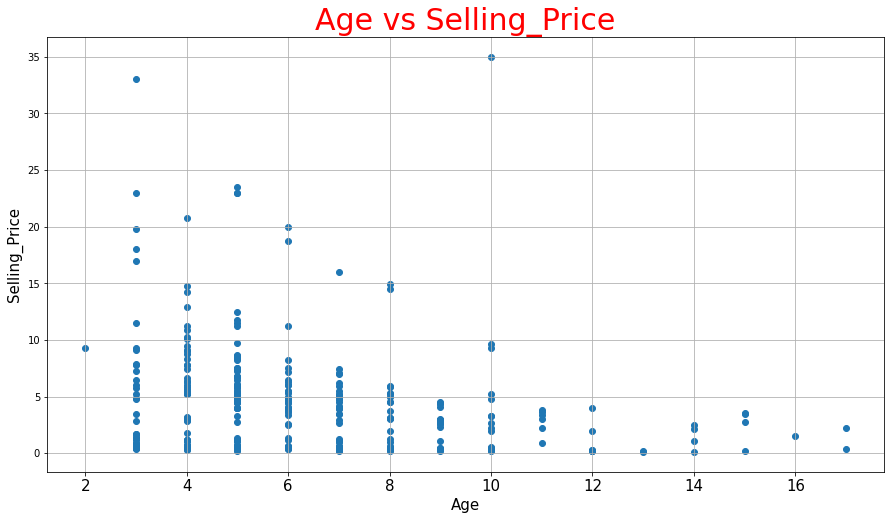

In [8]:
#plot Age & Selling_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Age'],df['Selling_Price'])
plt.title('Age vs Selling_Price',fontsize=30,c='red')
plt.xlabel("Age",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.grid()
plt.show()

In [9]:
high = df['Age'].nlargest(3)
high

37    17
39    17
77    16
Name: Age, dtype: int64

In [10]:
df.loc[37, : ]

Age                  17.00
Present_Price         2.28
Kms_Driven       127000.00
Fuel_Type             1.00
Seller_Type           0.00
Transmission          1.00
Owner                 0.00
Selling_Price         0.35
Name: 37, dtype: float64

In [11]:
df.loc[39, : ]

Age                 17.00
Present_Price        7.98
Kms_Driven       62000.00
Fuel_Type            1.00
Seller_Type          1.00
Transmission         1.00
Owner                0.00
Selling_Price        2.25
Name: 39, dtype: float64

In [12]:
df.loc[77, : ]

Age                  16.00
Present_Price        12.35
Kms_Driven       135154.00
Fuel_Type             1.00
Seller_Type           1.00
Transmission          0.00
Owner                 0.00
Selling_Price         1.50
Name: 77, dtype: float64

In [13]:
high= df['Selling_Price'].nlargest(1)
high

86    35.0
Name: Selling_Price, dtype: float64

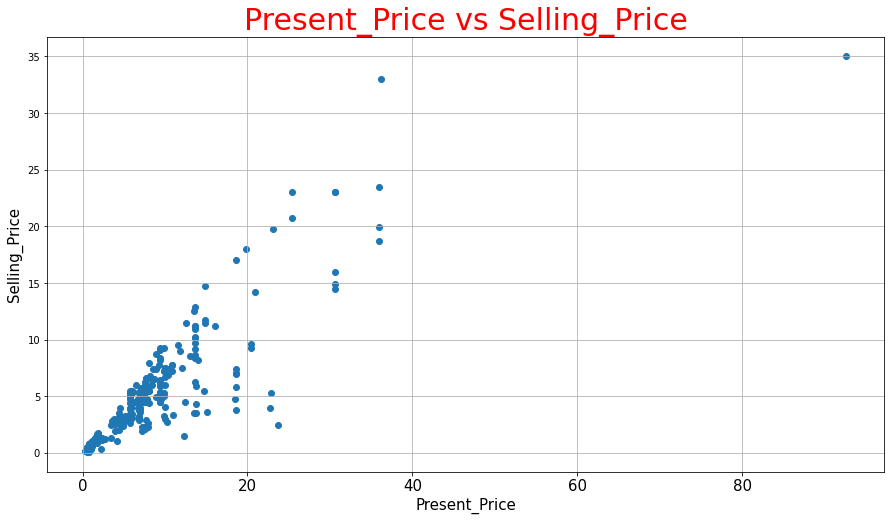

In [14]:
#plot Present_Price & Selling_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Present_Price'],df['Selling_Price'])
plt.title('Present_Price vs Selling_Price',fontsize=30,c='red')
plt.xlabel("Present_Price",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.grid()
plt.show()

In [15]:
high= df['Present_Price'].nlargest(1)
high

86    92.6
Name: Present_Price, dtype: float64

In [16]:
df.loc[86, : ]

Age                 10.0
Present_Price       92.6
Kms_Driven       78000.0
Fuel_Type            2.0
Seller_Type          1.0
Transmission         1.0
Owner                0.0
Selling_Price       35.0
Name: 86, dtype: float64

In [17]:
print(df.loc[[86]])

    Age  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
86   10           92.6       78000          2            1             1   

    Owner  Selling_Price  
86      0           35.0  


I find out that  the row of index 86, isn't noise.this is the most expensive car 
# 



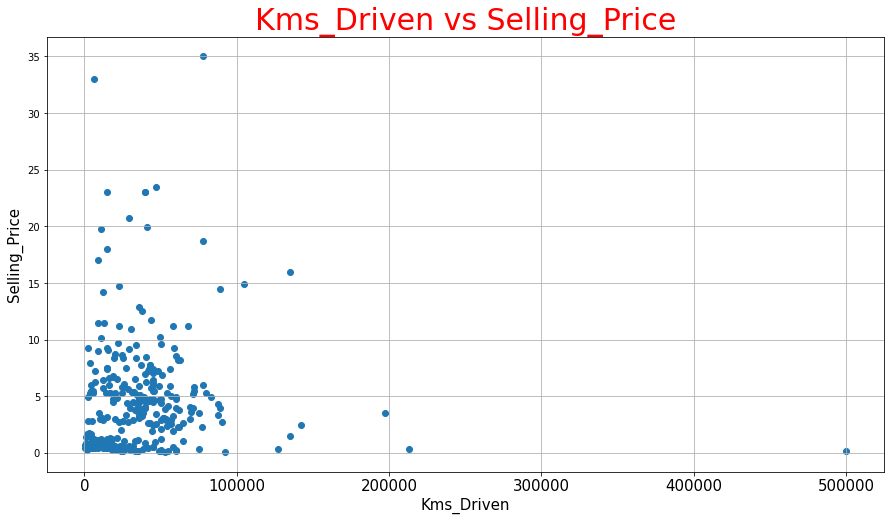

In [18]:
#plot Kms_Driven & Selling_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Kms_Driven'],df['Selling_Price'])
plt.title('Kms_Driven vs Selling_Price',fontsize=30,c='red')
plt.xlabel("Kms_Driven",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.grid()
plt.show()

In [19]:
high= df['Kms_Driven'].nlargest(1)
high

196    500000
Name: Kms_Driven, dtype: int64

In [20]:
df.loc[196, : ]

Age                  12.00
Present_Price         0.52
Kms_Driven       500000.00
Fuel_Type             1.00
Seller_Type           0.00
Transmission          0.00
Owner                 0.00
Selling_Price         0.17
Name: 196, dtype: float64

#### this is true that a car has worked 500000 kilometer in 12 years
# 


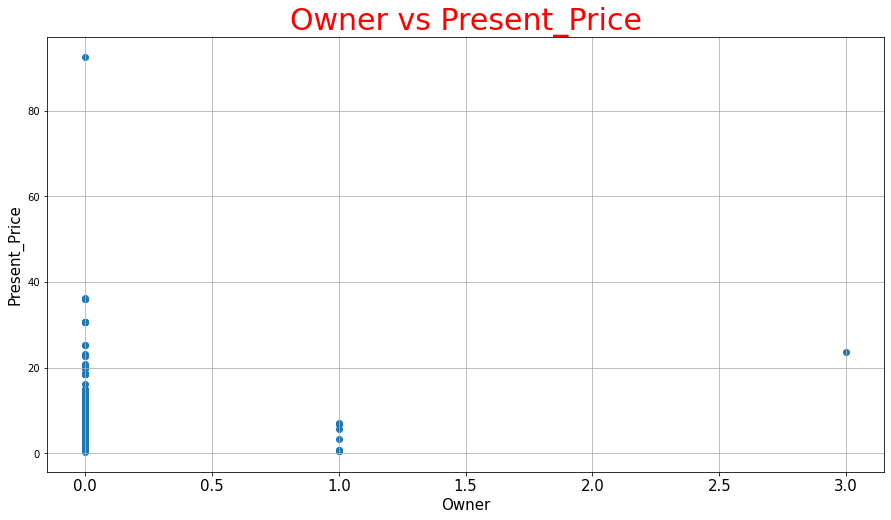

In [21]:
#plot Owner & Present_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Owner'],df['Present_Price'])
plt.title('Owner vs Present_Price',fontsize=30,c='red')
plt.xlabel("Owner",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Present_Price",fontsize=15)
plt.grid()
plt.show()

In [22]:
#بررسی اینکه آیا ماشینی هست که یک صاحب قبلی داشته ولی قیمتش صفر باشد؟ خیر
df100= df[df['Owner']==1]
df100

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
58,6,6.80,39485,1,1,1,1,4.10
106,6,3.45,16500,1,0,1,1,1.35
184,12,0.75,26000,1,0,1,1,0.25
191,8,0.57,25000,1,0,1,1,0.20
192,13,0.75,49000,1,0,1,1,0.20
193,7,0.65,24000,1,0,1,1,0.20
198,9,0.57,35000,1,0,1,1,0.15
201,10,6.79,58000,2,1,1,1,3.25
205,4,5.70,3493,1,1,1,1,5.25
241,5,7.13,35866,1,1,1,1,4.75


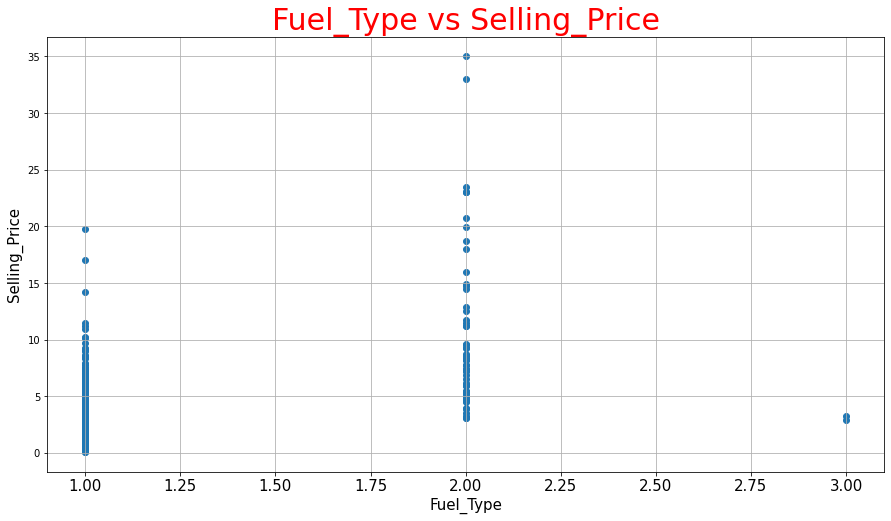

In [23]:
#plot Fuel_Type & Selling_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Fuel_Type'],df['Selling_Price'])
plt.title('Fuel_Type vs Selling_Price',fontsize=30,c='red')
plt.xlabel("Fuel_Type",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.grid()
plt.show()

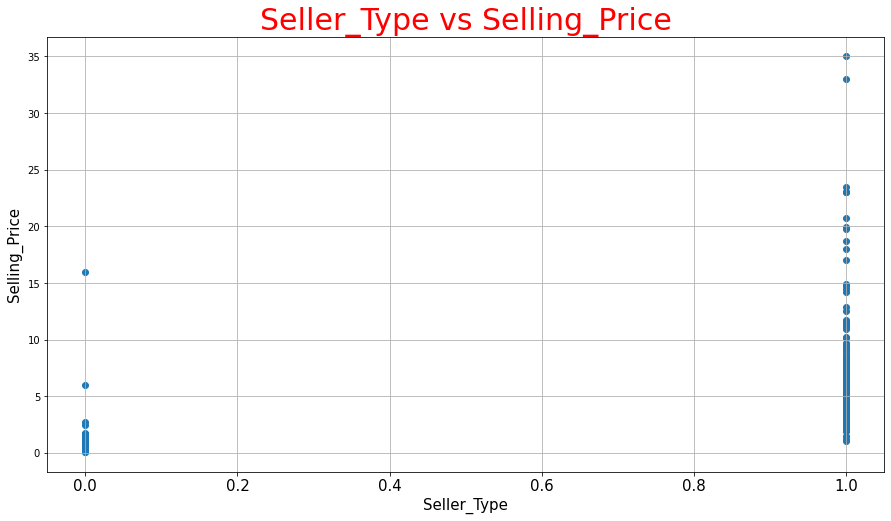

In [24]:
#plot Seller_Type & Selling_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Seller_Type'],df['Selling_Price'])
plt.title('Seller_Type vs Selling_Price',fontsize=30,c='red')
plt.xlabel("Seller_Type",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.grid()
plt.show()

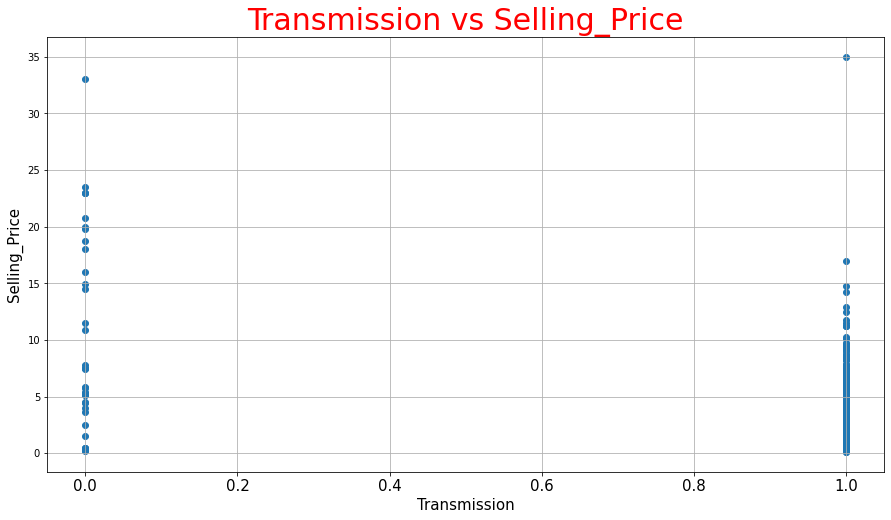

In [25]:
#plot Transmission & Selling_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Transmission'],df['Selling_Price'])
plt.title('Transmission vs Selling_Price',fontsize=30,c='red')
plt.xlabel("Transmission",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.grid()
plt.show()

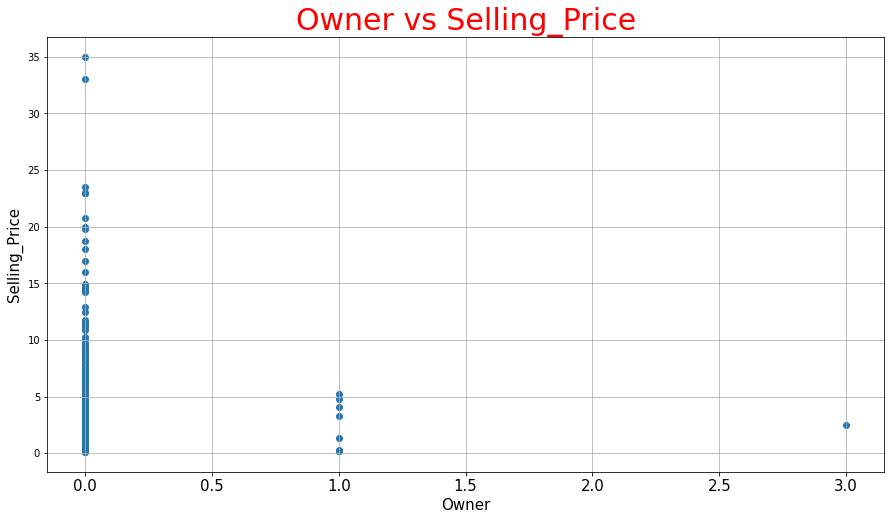

In [26]:
#plot Owner & Selling_Price to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['Owner'],df['Selling_Price'])
plt.title('Owner vs Selling_Price',fontsize=30,c='red')
plt.xlabel("Owner",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.grid()
plt.show()

###  I found out that, there isn't any noise because all far points are rational
### but for testing , in another code , I made a model by deleting far points,the results was poor
### so I choose the model with all data that, has better score and I don't delet any point

# 
# 

###  checking missing values

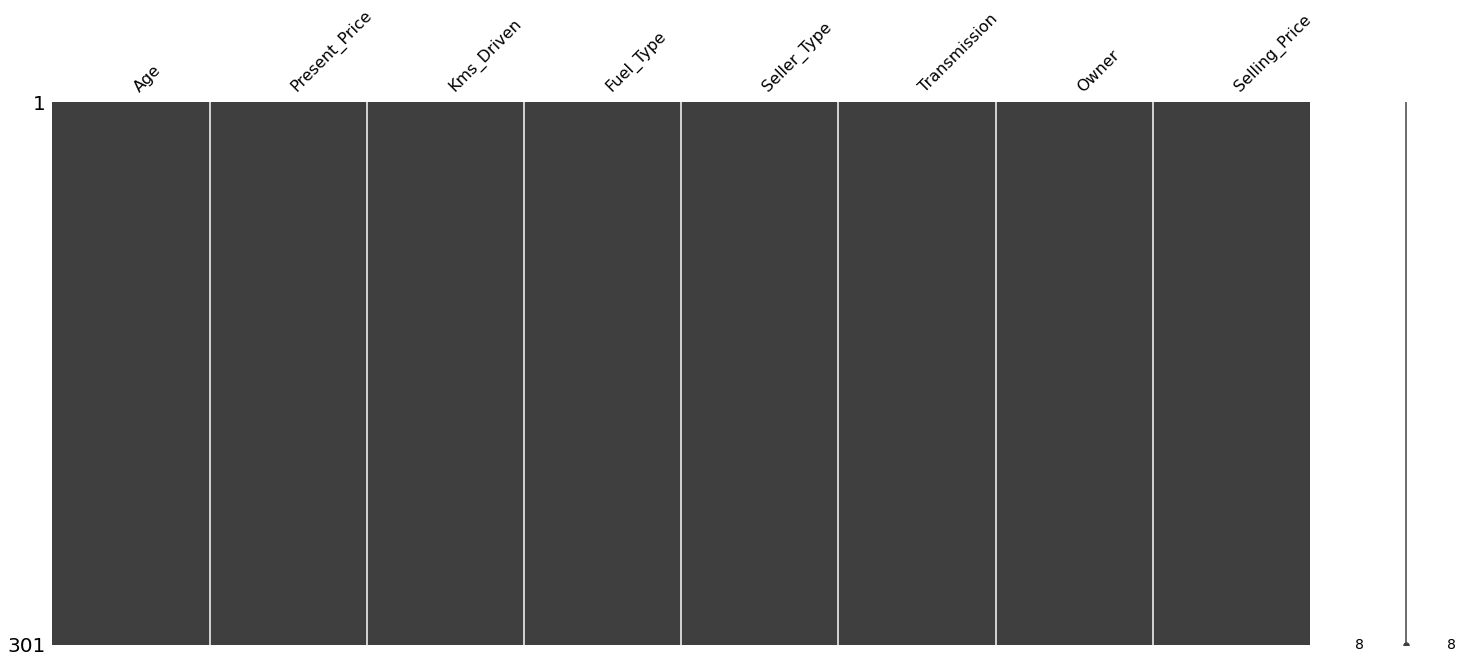

In [27]:
#view missing values
import missingno as msno
msno.matrix(df)
plt.show()

##### there is no missing values

# 
# 
# 
# 




## reproccessing data for analisys

In [28]:
df.describe()

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,6.372093,7.628472,36947.205980,1.212625,0.647841,0.867110,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,5.082812
min,2.000000,0.320000,500.000000,1.000000,0.000000,0.000000,0.000000,0.100000
25%,4.000000,1.200000,15000.000000,1.000000,0.000000,1.000000,0.000000,0.900000
50%,6.000000,6.400000,32000.000000,1.000000,1.000000,1.000000,0.000000,3.600000
75%,8.000000,9.900000,48767.000000,1.000000,1.000000,1.000000,0.000000,6.000000
max,17.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,3.000000,35.000000


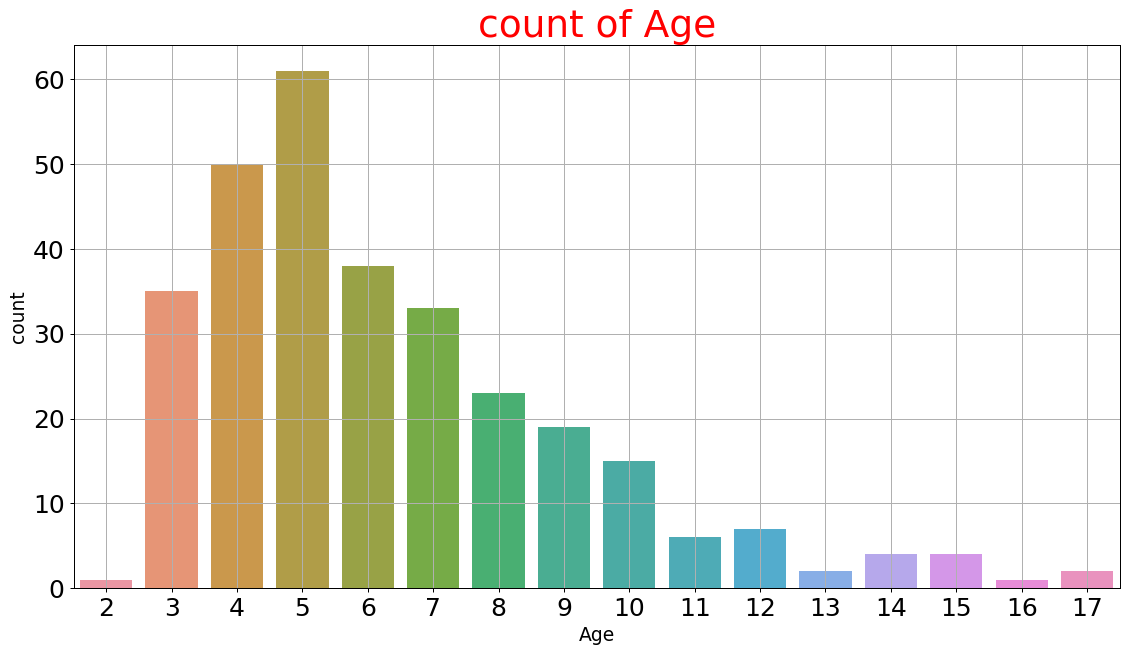

In [29]:
# using countplot for columns 
plt.figure(figsize=(15,8),dpi = 90)
ax = sns.countplot(x = "Age", data = df)
plt.xlabel("Age",fontsize = 15)
plt.ylabel("count",fontsize = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("count of Age",fontsize = 30, c= 'red')
plt.grid()


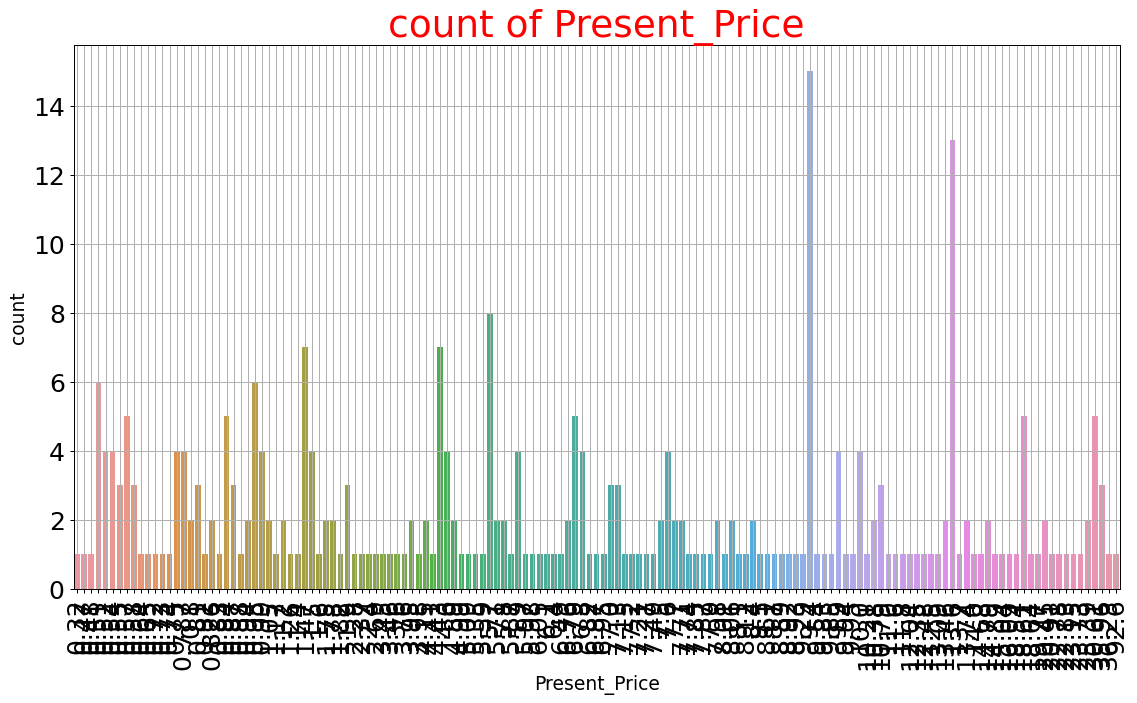

In [30]:
# using countplot for columns 
plt.figure(figsize=(15,8),dpi = 90)
ax = sns.countplot(x = "Present_Price", data = df)
plt.xlabel("Present_Price",fontsize = 15)
plt.ylabel("count",fontsize = 15)
plt.xticks(rotation = 90,fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("count of Present_Price",fontsize = 30, c= 'red')
plt.grid()

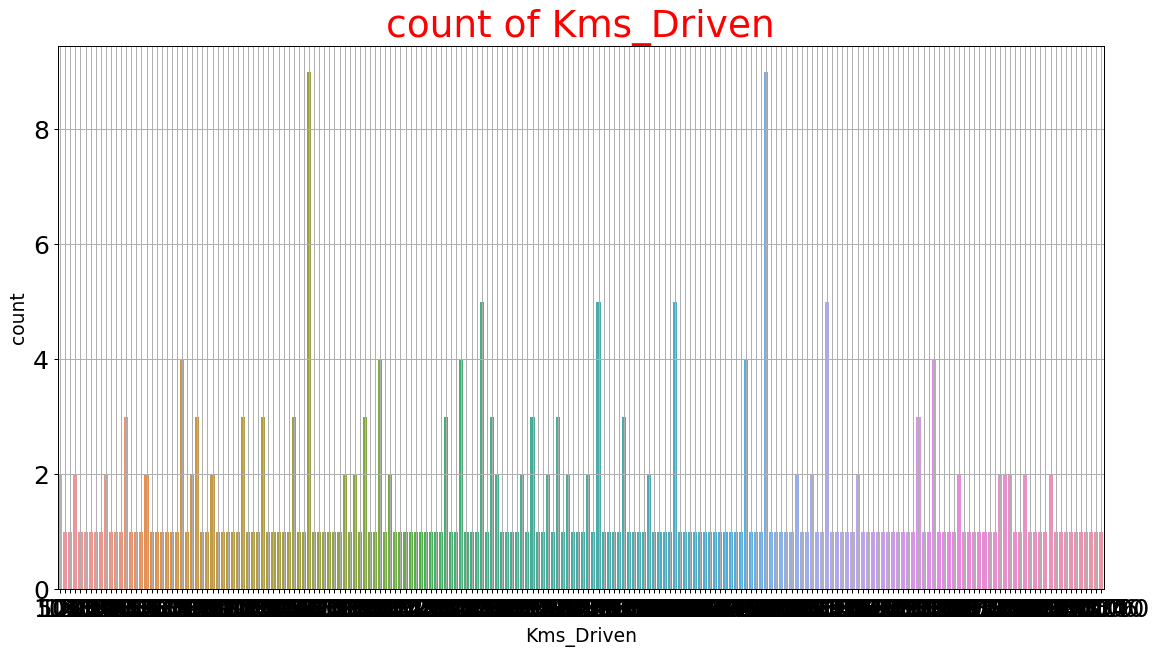

In [31]:
# using countplot for columns 
plt.figure(figsize=(15,8),dpi = 90)
ax = sns.countplot(x = "Kms_Driven", data = df)
plt.xlabel("Kms_Driven",fontsize = 15)
plt.ylabel("count",fontsize = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("count of Kms_Driven",fontsize = 30, c= 'red')
plt.grid()

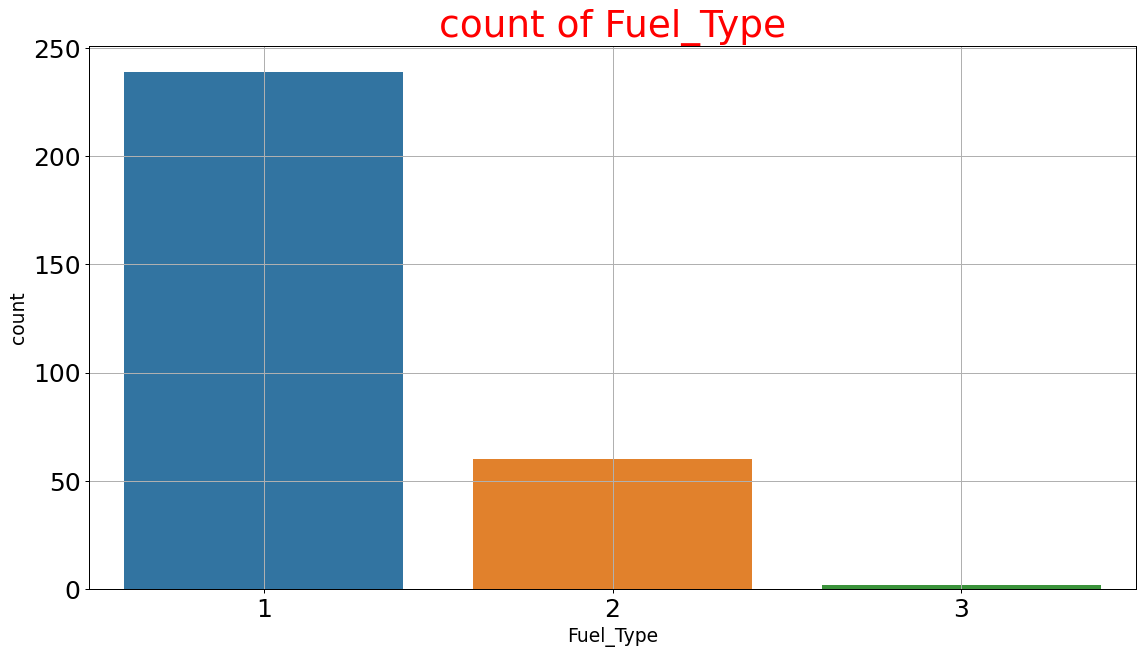

In [32]:
# using countplot for columns 
plt.figure(figsize=(15,8),dpi = 90)
ax = sns.countplot(x = "Fuel_Type", data = df)
plt.xlabel("Fuel_Type",fontsize = 15)
plt.ylabel("count",fontsize = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("count of Fuel_Type",fontsize = 30, c= 'red')
plt.grid()

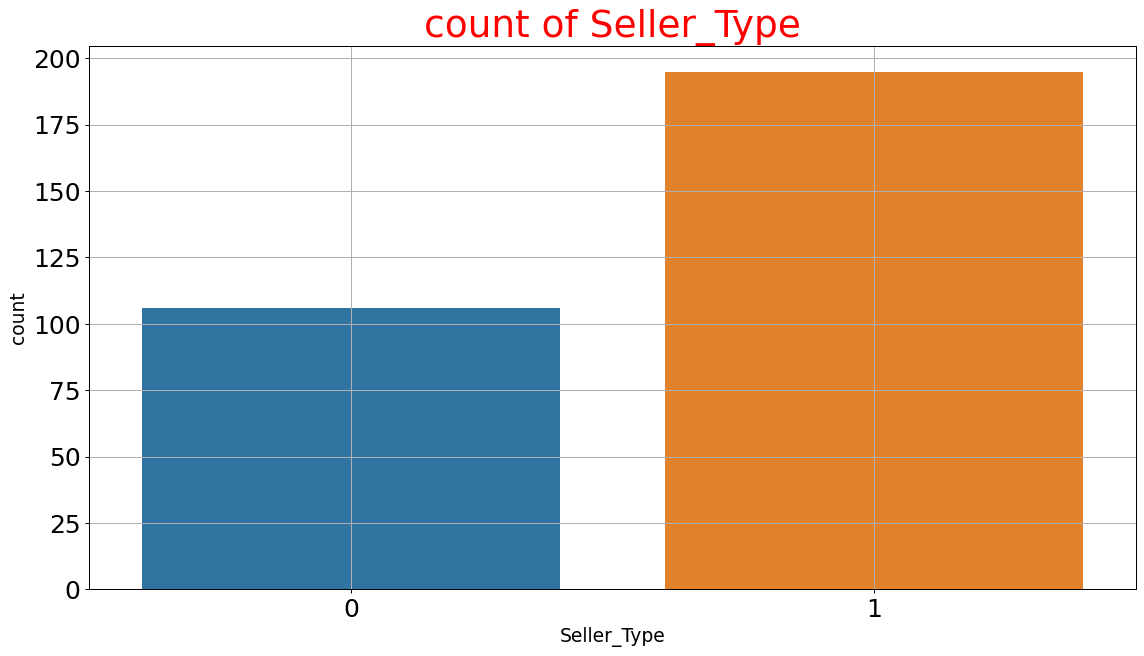

In [33]:
# using countplot for columns 
plt.figure(figsize=(15,8),dpi = 90)
ax = sns.countplot(x = "Seller_Type", data = df)
plt.xlabel("Seller_Type",fontsize = 15)
plt.ylabel("count",fontsize = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("count of Seller_Type",fontsize = 30, c= 'red')
plt.grid()

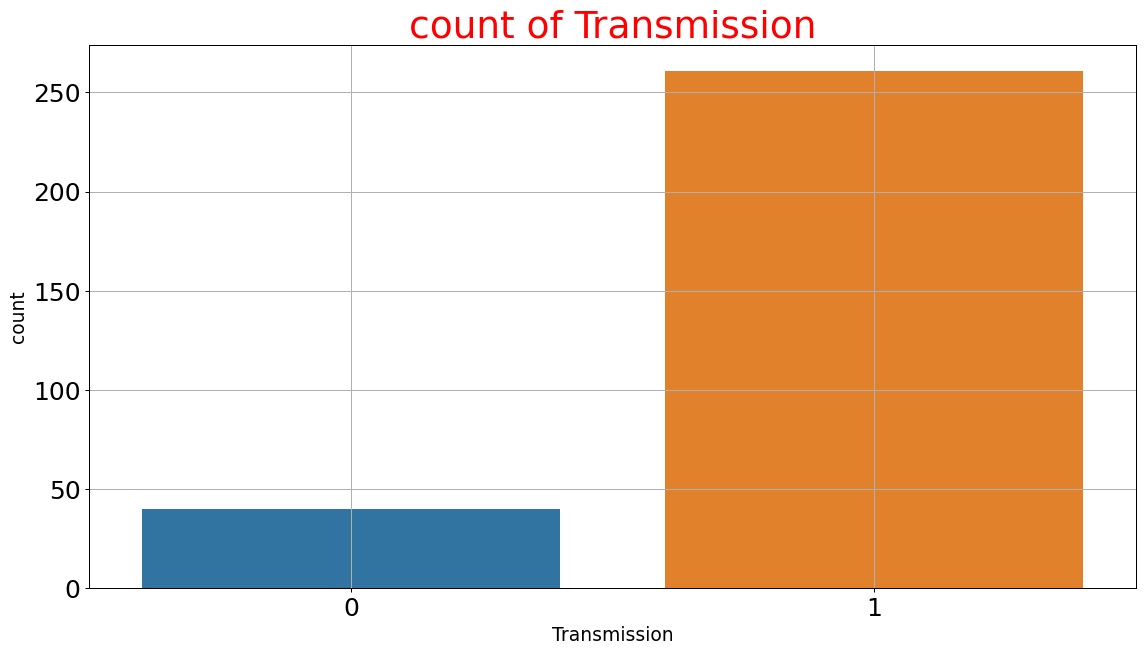

In [34]:
# using countplot for columns 
plt.figure(figsize=(15,8),dpi = 90)
ax = sns.countplot(x = "Transmission", data = df)
plt.xlabel("Transmission",fontsize = 15)
plt.ylabel("count",fontsize = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("count of Transmission",fontsize = 30, c= 'red')
plt.grid()

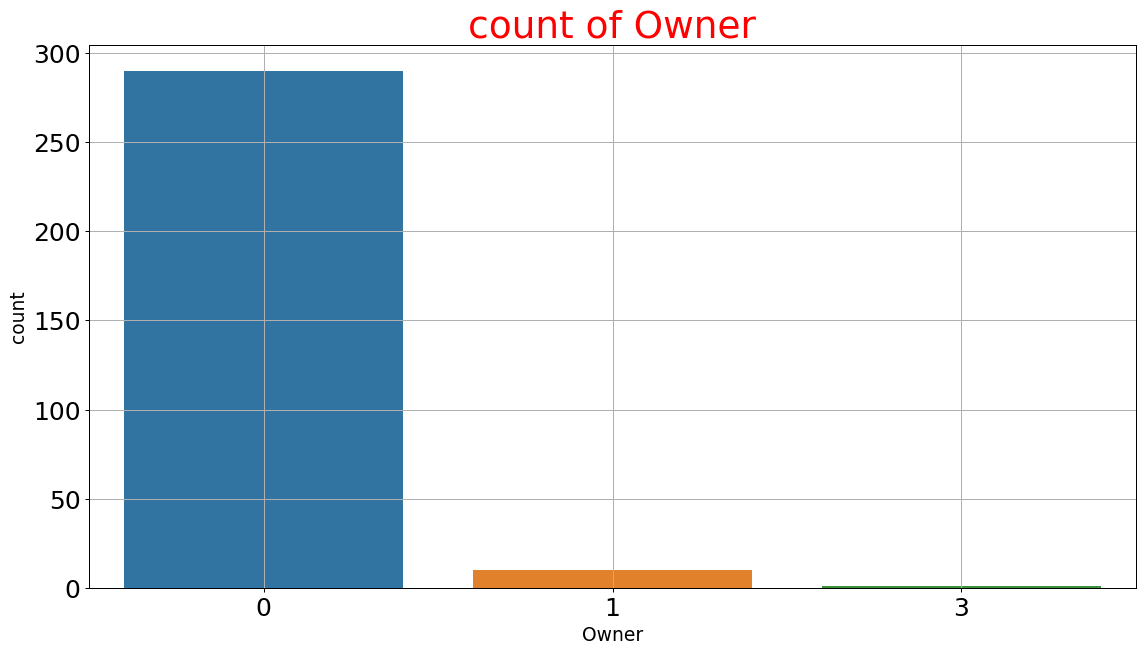

In [35]:
# using countplot for columns 
plt.figure(figsize=(15,8),dpi = 90)
ax = sns.countplot(x = "Owner", data = df)
plt.xlabel("Owner",fontsize = 15)
plt.ylabel("count",fontsize = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("count of Owner",fontsize = 30, c= 'red')
plt.grid()

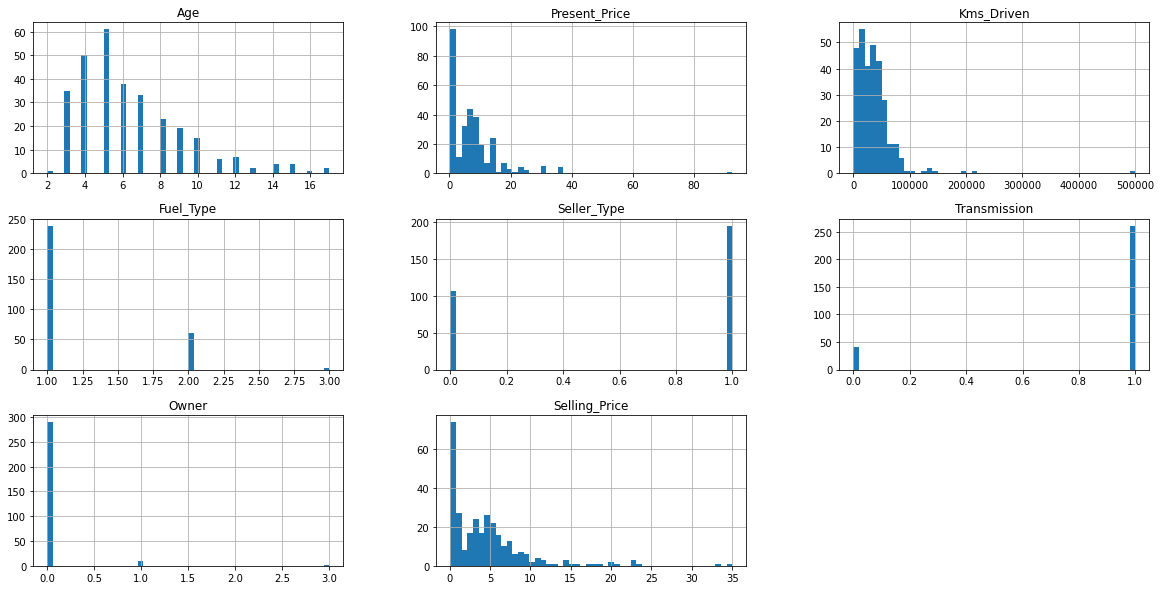

In [36]:
df.hist(bins=50, figsize=(20, 10))
plt.show()

# 
## making linear regression model

In [37]:
#feature_cols = ['Present_Price','Seller_Type','Fuel_Type','Transmission','Age','Owner','Kms_Driven']
x = pd.DataFrame(df , columns=['Present_Price','Seller_Type','Fuel_Type','Transmission','Age','Owner','Kms_Driven'])
y = df.Selling_Price.values.reshape(-1,1) # Target variable
x

,Present_Price,Seller_Type,Fuel_Type,Transmission,Age,Owner,Kms_Driven
0,5.59,1,1,1,6,0,27000
1,9.54,1,2,1,7,0,43000
2,9.85,1,1,1,3,0,6900
3,4.15,1,1,1,9,0,5200
4,6.87,1,2,1,6,0,42450
...,...,...,...,...,...,...,...
296,11.60,1,2,1,4,0,33988
297,5.90,1,1,1,5,0,60000
298,11.00,1,1,1,11,0,87934
299,12.50,1,2,1,3,0,9000


In [38]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train , y_train)
y_pred = regressor.predict(x_test)
r2 = metrics.r2_score(y_test , y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R2 score:',r2)   

Mean Absolute Error: 1.0000326012149943
Mean Squared Error: 2.1885564456592363
Root Mean Squared Error: 1.4793770464824836
R2 score: 0.9134181721223894


###  R2 score: 0.9134181721223894

# 
# 
## making nonlinear model to achive better score

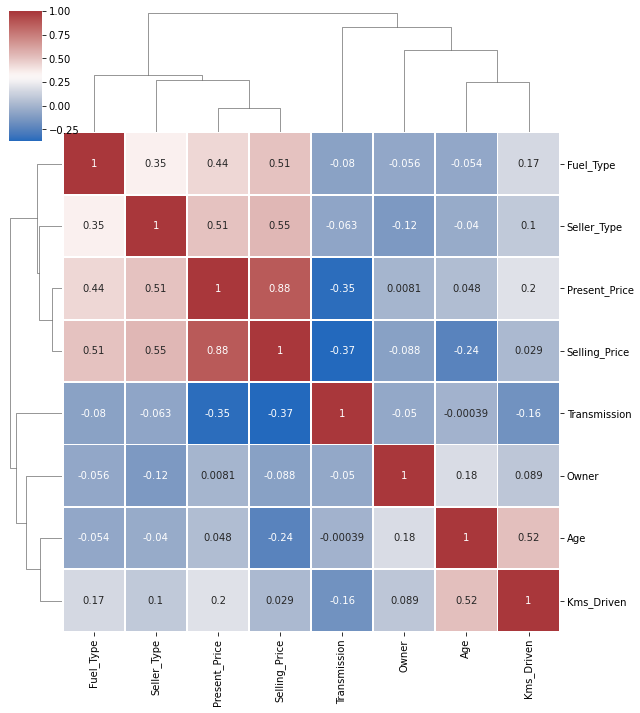

In [39]:
# correlation to find a ranking for importance of features for give more dimention
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2),annot = True, linewidths = .8, figsize = (9,10))
plt.show()

## feature importance
#### 1- Present_Price
#### 2- Seller_Type
#### 3- Fuel_Type
#### 4- Transmission
#### 5- Age
#### 6- Owner
#### 7- Kms_Driven
# 
# 

### adding power 2 of columns if they improve the score 

In [40]:
# making a dataframe without target to make function
x1 = pd.DataFrame(df , columns=['Present_Price','Seller_Type','Fuel_Type','Transmission','Age','Owner','Kms_Driven'])

# making function
def check(pow,testsize):
    r2 = 0.9134181721223894
    for column in x1:
        j = column+ str(pow)
        n = x1[column]**pow
        x.insert(0, j, n)
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=testsize ,random_state = 0)
        regressor = LinearRegression()
        regressor.fit(x_train , y_train)
        y_pred = regressor.predict(x_test)
        r2_new = metrics.r2_score(y_test , y_pred)
        if r2_new < r2:
            x.drop([j],axis =1,inplace = True)
        else:
            r2 = r2_new
    print('R2 score:',r2)    

In [41]:
check(2,0.2)

R2 score: 0.9311515333475224


### R2 score: 0.9311515333475224   
#### after add power 2 of columns if they improve the score
# 



### adding power 3 of columns if they improve the score

In [42]:
# making a function to add power3 of columns if they improve the score
def check(pow,testsize):
    r2 = 0.9311515333475224
    for column in x1:
        j = column+ str(pow)
        n = x1[column]**pow
        x.insert(0, j, n)
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=testsize ,random_state = 0)
        regressor = LinearRegression()
        regressor.fit(x_train , y_train)
        y_pred = regressor.predict(x_test)
        r2_new = metrics.r2_score(y_test , y_pred)
        if r2_new < r2:
            x.drop([j],axis =1,inplace = True)
        else:
            r2 = r2_new
    print('R2 score:',r2)   

In [43]:
check(3,0.2)

R2 score: 0.9311515333475268


### R2 score: 0.9311515333475268 
#### after add power 3 of columns if they improve the score
# 


### adding power 4 of columns if they improve the score

In [44]:
# adding power 4 of columns if they improve the score
def check(pow,testsize):
    r2 = 0.9311515333475268
    for column in x1:
        j = column+ str(pow)
        n = x1[column]**pow
        x.insert(0, j, n)
        x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=testsize ,random_state = 0)
        regressor = LinearRegression()
        regressor.fit(x_train , y_train)
        y_pred = regressor.predict(x_test)
        r2_new = metrics.r2_score(y_test , y_pred)
        if r2_new < r2:
            x.drop([j],axis =1,inplace = True)
        else:
            r2 = r2_new
    print('R2 score:',r2)   

In [45]:
check(4,0.2)

R2 score: 0.9311515357500473


### R2 score: 0.9311515357500473   
#### after add power 3 of columns if they improve the score
# 
# 

### power 5 doesn't change R2 score so I don't continue raising power
# 
# 
# 

### making normal distribution of Age column 
### because the shape of points for plot of Age Selling_Price is like normal distribution

In [46]:
# we use standard deviation and mean to make normal distribution
df.describe()

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,6.372093,7.628472,36947.205980,1.212625,0.647841,0.867110,0.043189,4.661296
std,2.891554,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,5.082812
min,2.000000,0.320000,500.000000,1.000000,0.000000,0.000000,0.000000,0.100000
25%,4.000000,1.200000,15000.000000,1.000000,0.000000,1.000000,0.000000,0.900000
50%,6.000000,6.400000,32000.000000,1.000000,1.000000,1.000000,0.000000,3.600000
75%,8.000000,9.900000,48767.000000,1.000000,1.000000,1.000000,0.000000,6.000000
max,17.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,3.000000,35.000000


In [47]:
#add normal distribution of column Age
import math
normal_Age = (1/ (2.891554*((2*math.pi)**(1/2))))* (math.e ** ((-(x1.Age - 6.372093)**2))/(2*2.891554**2))
x.insert(0,'normal_Age',normal_Age)
x

,normal_Age,Seller_Type4,Owner3,Kms_Driven2,Owner2,Fuel_Type2,Seller_Type2,Present_Price2,Present_Price,Seller_Type,Fuel_Type,Transmission,Age,Owner,Kms_Driven
0,7.183841e-03,1,0,729000000,0,1,1,31.2481,5.59,1,1,1,6,0,27000
1,5.562347e-03,1,0,1849000000,0,4,1,91.0116,9.54,1,2,1,7,0,43000
2,9.508647e-08,1,0,47610000,0,1,1,97.0225,9.85,1,1,1,3,0,6900
3,8.265973e-06,1,0,27040000,0,1,1,17.2225,4.15,1,1,1,9,0,5200
4,7.183841e-03,1,0,1802002500,0,4,1,47.1969,6.87,1,2,1,6,0,42450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.970209e-05,1,0,1155184144,0,4,1,134.5600,11.60,1,2,1,4,0,33988
297,1.255643e-03,1,0,3600000000,0,1,1,34.8100,5.90,1,1,1,5,0,60000
298,4.120729e-12,1,0,7732388356,0,1,1,121.0000,11.00,1,1,1,11,0,87934
299,9.508647e-08,1,0,81000000,0,4,1,156.2500,12.50,1,2,1,3,0,9000


In [48]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train , y_train)
y_pred = regressor.predict(x_test)
r2 = metrics.r2_score(y_test , y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R2 score:',r2)   

Mean Absolute Error: 0.9894548744075267
Mean Squared Error: 1.7144242515711017
Root Mean Squared Error: 1.3093602451468815
R2 score: 0.9321753908823595


### R2 score: 0.9321753908823595
#### after adding normal distribution of column Age

# 
# 
### add pruduct of features 

In [49]:
# making a function for product of columns if they improve the score
def product(testsize):
    i=1
    r2 = 0.9321753908823595
    for column in x1:
        if i == 7:
            break
        if i==6:
            x2 = x1[['Kms_Driven']]
        if i < 6:
            x2 = x1.iloc[ : ,i :]
        for col in x2:
            j = column+col
            n = x1[column] * x2[col]
            x.insert(0, j, n)
            x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=testsize ,random_state = 0)
            regressor = LinearRegression()
            regressor.fit(x_train , y_train)
            y_pred = regressor.predict(x_test)
            r2_new = metrics.r2_score(y_test , y_pred)
            if r2_new < r2:
                x.drop([j],axis =1,inplace = True)
            if r2_new >= r2:
                r2 = r2_new
        i+=1
        
    print('R2 score:',r2)       
            
    

In [50]:
product(0.2)

R2 score: 0.9706806470730952


In [75]:
x1

,Present_Price,Seller_Type,Fuel_Type,Transmission,Age,Owner,Kms_Driven
0,5.59,1,1,1,6,0,27000
1,9.54,1,2,1,7,0,43000
2,9.85,1,1,1,3,0,6900
3,4.15,1,1,1,9,0,5200
4,6.87,1,2,1,6,0,42450
...,...,...,...,...,...,...,...
296,11.60,1,2,1,4,0,33988
297,5.90,1,1,1,5,0,60000
298,11.00,1,1,1,11,0,87934
299,12.50,1,2,1,3,0,9000


### R2 score: 0.9706806470730952
#### this is the score after using useful product of features
# 

# 
## cross validation
### I use cross validation method for nonlinear regression
### because the score of K-Fold for linear regression was much smaller than nonlinear

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=4)
results = (cross_val_score(regressor, x, y, cv=k_fold, n_jobs=1))
print(results)
print(np.mean(results))

[0.94582683 0.29513871 0.88542889 0.91756491]
0.7609898331456003


#### 4 fold has the best score, so I delet the second fold 
# 

In [52]:
df2 = pd.DataFrame(df.Selling_Price)
frames = [df2,x]
df3 = pd.concat(frames,axis=1)
# deleting the third fold
df4 = df3[df3.index < 75]
df5 = df3[df3.index > 150]
df6 = df4.append(df5)
df6.reset_index(drop = True , inplace = True)
df6

,Selling_Price,AgeKms_Driven,AgeOwner,Fuel_TypeKms_Driven,Fuel_TypeOwner,Fuel_TypeTransmission,Seller_TypeKms_Driven,Seller_TypeAge,Seller_TypeTransmission,Present_PriceAge,...,Fuel_Type2,Seller_Type2,Present_Price2,Present_Price,Seller_Type,Fuel_Type,Transmission,Age,Owner,Kms_Driven
0,3.35,162000,0,27000,0,1,27000,6,1,33.54,...,1,1,31.2481,5.59,1,1,1,6,0,27000
1,4.75,301000,0,86000,0,2,43000,7,1,66.78,...,4,1,91.0116,9.54,1,2,1,7,0,43000
2,7.25,20700,0,6900,0,1,6900,3,1,29.55,...,1,1,97.0225,9.85,1,1,1,3,0,6900
3,2.85,46800,0,5200,0,1,5200,9,1,37.35,...,1,1,17.2225,4.15,1,1,1,9,0,5200
4,4.60,254700,0,84900,0,2,42450,6,1,41.22,...,4,1,47.1969,6.87,1,2,1,6,0,42450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,9.50,135952,0,67976,0,2,33988,4,1,46.40,...,4,1,134.5600,11.60,1,2,1,4,0,33988
221,4.00,300000,0,60000,0,1,60000,5,1,29.50,...,1,1,34.8100,5.90,1,1,1,5,0,60000
222,3.35,967274,0,87934,0,1,87934,11,1,121.00,...,1,1,121.0000,11.00,1,1,1,11,0,87934
223,11.50,27000,0,18000,0,2,9000,3,1,37.50,...,4,1,156.2500,12.50,1,2,1,3,0,9000


####  rows from 75 to 150 were deleted
# 

In [53]:
y = df6.Selling_Price.values.reshape(-1,1)
x = df6.drop(['Selling_Price'], axis = 1)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train , y_train)
y_pred = regressor.predict(x_test)
r2 = metrics.r2_score(y_test , y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R2 score:',r2)  

Mean Absolute Error: 0.5874762697037741
Mean Squared Error: 0.9578784093226426
Root Mean Squared Error: 0.9787126285701245
R2 score: 0.9731686566421694


### R2 score: 0.9731686566421694
#### this is  final score after using cross validation
# 

### itercept and coeficients

In [54]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train , y_train)
y_pred = regressor.predict(x_test)
print('intercept =',regressor.intercept_)
m = regressor.coef_
cdf = pd.DataFrame(m.transpose(), x.columns, columns = ['coeficients'])
print(cdf)

intercept = [-4.06809499]
                            coeficients
AgeKms_Driven              2.729604e-06
AgeOwner                  -4.767363e-02
Fuel_TypeKms_Driven       -9.633463e-07
Fuel_TypeOwner             8.369341e-02
Fuel_TypeTransmission     -9.486062e-01
Seller_TypeKms_Driven     -6.575812e-06
Seller_TypeAge             6.072941e-02
Seller_TypeTransmission    3.494648e-01
Present_PriceAge          -6.508239e-02
Present_PriceTransmission -1.307485e-01
normal_Age                -4.771443e+01
Seller_Type4              -1.313788e-01
Owner3                     8.369341e-02
Kms_Driven2               -1.503295e-11
Owner2                     8.369341e-02
Fuel_Type2                -1.273074e+00
Seller_Type2              -1.313788e-01
Present_Price2            -8.144958e-03
Present_Price              1.222497e+00
Seller_Type               -1.313788e-01
Fuel_Type                  5.772820e+00
Transmission               1.116860e+00
Age                       -6.379401e-02
Owner         

# 
## now we want to plot test and pred

Text(0, 0.5, 'Prediction')

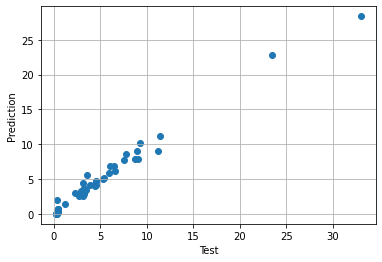

In [55]:
# compare y_test,y_pred
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("Test")
plt.ylabel("Prediction")

### angle 45 degree shows that the prediction is good
# 

In [56]:
compare = pd.DataFrame({'Actual': y_test.flatten(),'Predicted':y_pred.flatten()})
compare

,Actual,Predicted
0,0.25,0.015732
1,0.35,0.381297
2,2.25,3.073142
3,3.90,4.146868
4,0.50,0.356281
5,33.00,28.363117
6,4.50,4.177564
7,2.90,3.360295
8,8.99,9.033505
9,5.95,5.853864


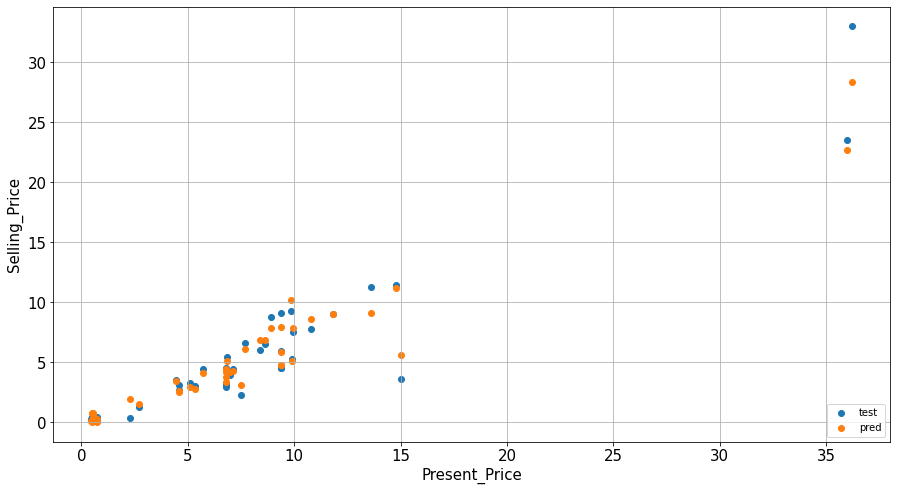

In [57]:
a = x_test.Present_Price
b = y_test
c = x_test.Present_Price
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("Present_Price",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [58]:
x_test.insert(0,"y_test",y_test)
x_test.insert(0,"y_pred",y_pred)
df10 = x_test.sort_values(by =["Present_Price"])

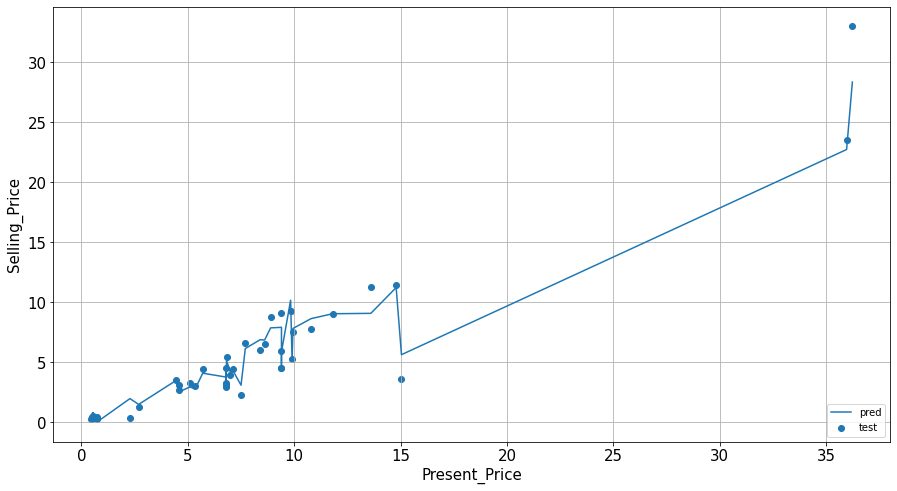

In [59]:
a = df10.Present_Price
b = df10.y_test
c = df10.Present_Price
d = df10.y_pred
plt.figure(figsize=(15,8))
plt.xlabel("Present_Price",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b,label ='test')
plt.plot(c,d,label ='pred')
plt.legend(loc='lower right')
plt.grid()
plt.show()

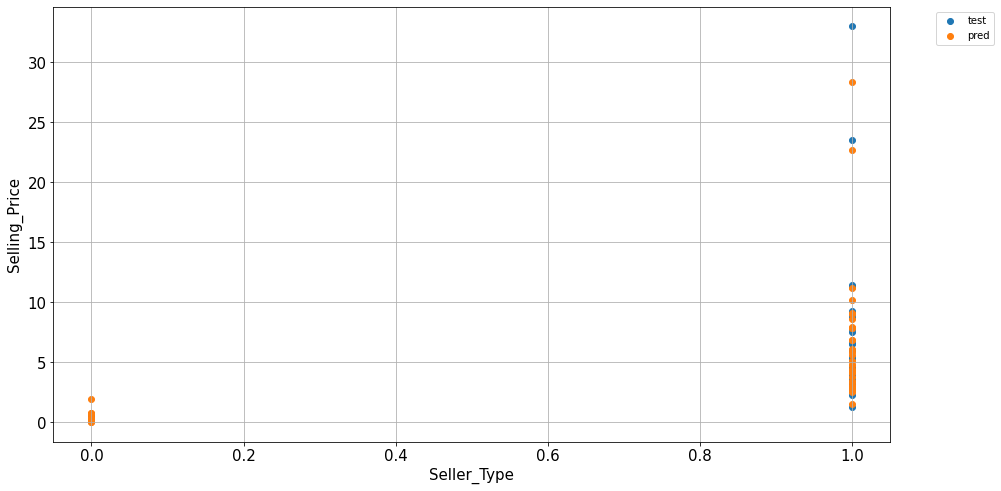

In [60]:
a = x_test.Seller_Type
b = y_test
c = x_test.Seller_Type
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("Seller_Type",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(prop={'size':10},bbox_to_anchor=(1.13,1))
plt.grid()
plt.show()

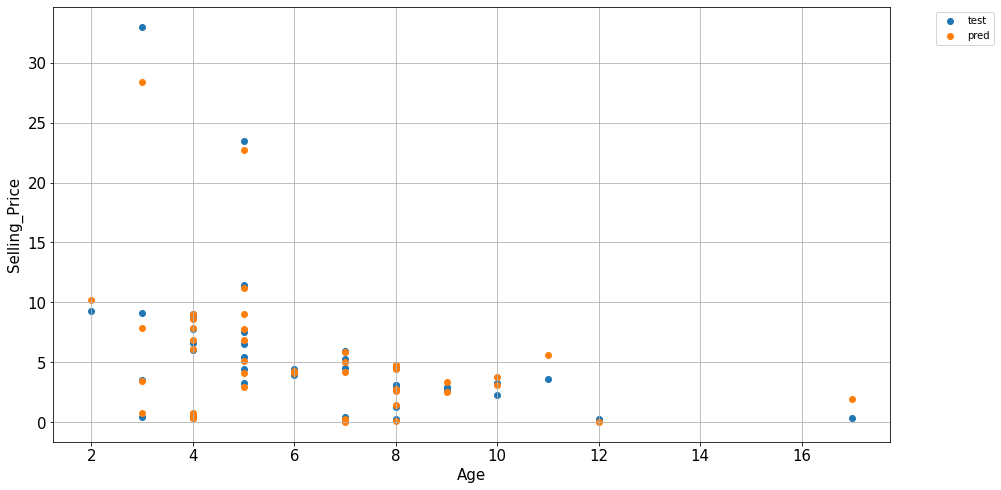

In [61]:
a = x_test.Age
b = y_test
c = x_test.Age
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("Age",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(prop={'size':10},bbox_to_anchor=(1.13,1))
plt.grid()
plt.show()

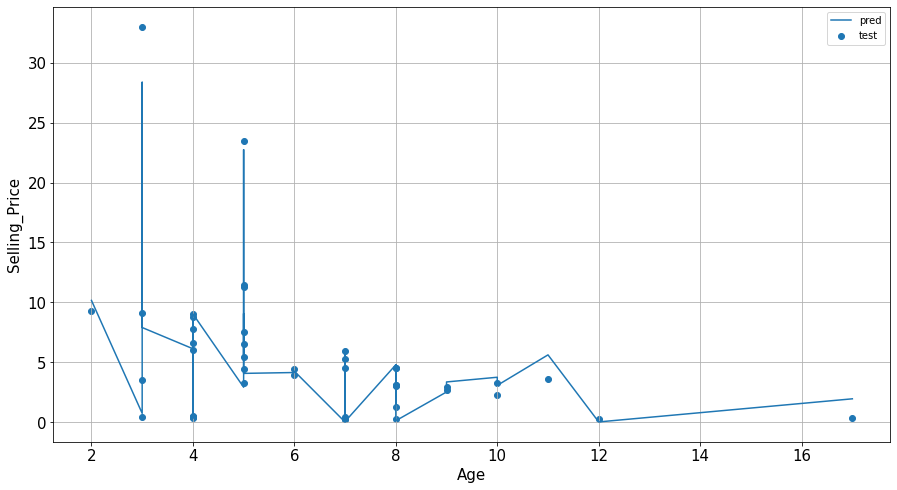

In [62]:
df10 = x_test.sort_values(by =["Age"])
a = df10.Age
b = df10.y_test
c = df10.Age
d = df10.y_pred
plt.figure(figsize=(15,8))
plt.xlabel("Age",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b,label ='test')
plt.plot(c,d,label ='pred')
plt.legend(loc='upper right')
plt.grid()
plt.show()

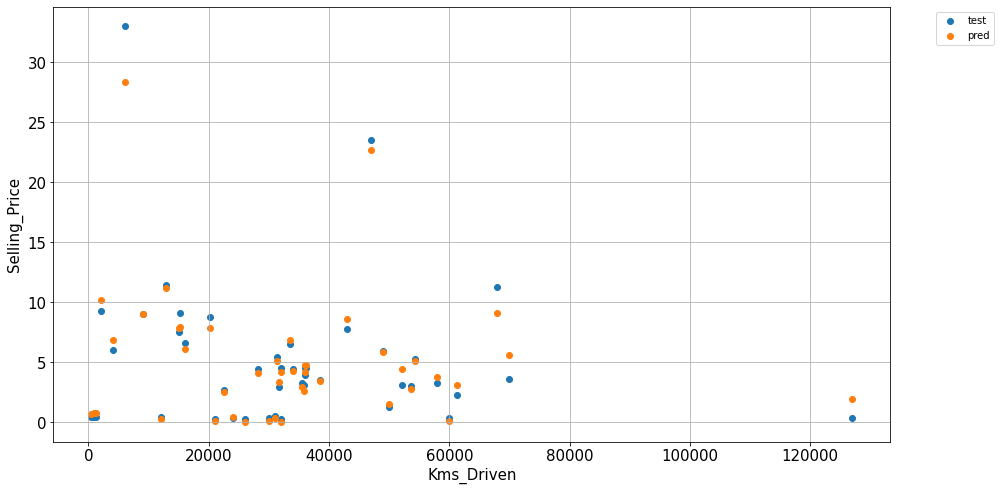

In [63]:
a = x_test.Kms_Driven
b = y_test
c = x_test.Kms_Driven
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("Kms_Driven",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(prop={'size':10},bbox_to_anchor=(1.13,1))
plt.grid()
plt.show()

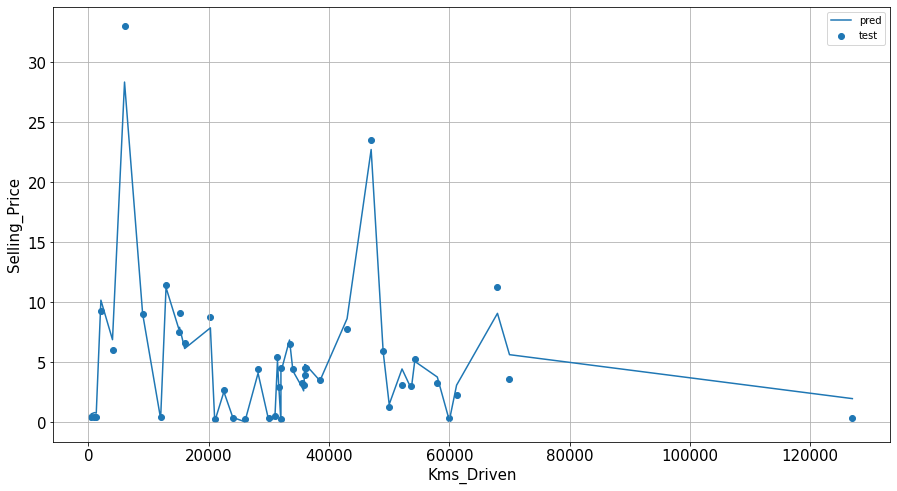

In [64]:
df10 = x_test.sort_values(by =["Kms_Driven"])
a = df10.Kms_Driven
b = df10.y_test
c = df10.Kms_Driven
d = df10.y_pred
plt.figure(figsize=(15,8))
plt.xlabel("Kms_Driven",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Selling_Price",fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a,b,label ='test')
plt.plot(c,d,label ='pred')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# 
### now we want to predict the cost of this car
#### Present_Price = 11.23
#### Kms_Driven = 42000
#### Fuel_Type = Petrol(1)
#### Seller_Type = Dealer(1)
#### Transmission = Manual(1)
#### Owner = 0
#### Age = 10
#### Selling_Price =?

In [65]:
for x in df6:
    print(x)

Selling_Price
AgeKms_Driven
AgeOwner
Fuel_TypeKms_Driven
Fuel_TypeOwner
Fuel_TypeTransmission
Seller_TypeKms_Driven
Seller_TypeAge
Seller_TypeTransmission
Present_PriceAge
Present_PriceTransmission
normal_Age
Seller_Type4
Owner3
Kms_Driven2
Owner2
Fuel_Type2
Seller_Type2
Present_Price2
Present_Price
Seller_Type
Fuel_Type
Transmission
Age
Owner
Kms_Driven


In [66]:
df22 = pd.DataFrame({"Selling_Price":[30],
                    "AgeKms_Driven":[420000],
                    "AgeOwner":[0],
                    "Fuel_TypeKms_Driven":[42000],
                    "Fuel_TypeOwner":[0],
                    "Fuel_TypeTransmission":[1],
                    "Seller_TypeKms_Driven":[42000],
                    "Seller_TypeAge":[10],
                    "Seller_TypeTransmission":[1],
                    "Present_PriceAge":[112.3],
                    "Present_PriceTransmission":[11.23],
                    "normal_Age":[1.586457602763525e-08],
                    "Seller_Type4":[1],
                    "Owner3":[0],
                    "Kms_Driven2":[1764000000],
                    "Owner2":[0],
                    "Fuel_Type2":[1],
                    "Seller_Type2":[1],
                    "Present_Price2":[126.1129],
                    "Present_Price":[11.23],
                    "Seller_Type":[1],
                    "Fuel_Type":[1],
                    "Transmission":[1],
                    "Age":[10],
                    "Owner":[0],
                    "Kms_Driven":[42000]})

In [67]:
df6

,Selling_Price,AgeKms_Driven,AgeOwner,Fuel_TypeKms_Driven,Fuel_TypeOwner,Fuel_TypeTransmission,Seller_TypeKms_Driven,Seller_TypeAge,Seller_TypeTransmission,Present_PriceAge,...,Fuel_Type2,Seller_Type2,Present_Price2,Present_Price,Seller_Type,Fuel_Type,Transmission,Age,Owner,Kms_Driven
0,3.35,162000,0,27000,0,1,27000,6,1,33.54,...,1,1,31.2481,5.59,1,1,1,6,0,27000
1,4.75,301000,0,86000,0,2,43000,7,1,66.78,...,4,1,91.0116,9.54,1,2,1,7,0,43000
2,7.25,20700,0,6900,0,1,6900,3,1,29.55,...,1,1,97.0225,9.85,1,1,1,3,0,6900
3,2.85,46800,0,5200,0,1,5200,9,1,37.35,...,1,1,17.2225,4.15,1,1,1,9,0,5200
4,4.60,254700,0,84900,0,2,42450,6,1,41.22,...,4,1,47.1969,6.87,1,2,1,6,0,42450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,9.50,135952,0,67976,0,2,33988,4,1,46.40,...,4,1,134.5600,11.60,1,2,1,4,0,33988
221,4.00,300000,0,60000,0,1,60000,5,1,29.50,...,1,1,34.8100,5.90,1,1,1,5,0,60000
222,3.35,967274,0,87934,0,1,87934,11,1,121.00,...,1,1,121.0000,11.00,1,1,1,11,0,87934
223,11.50,27000,0,18000,0,2,9000,3,1,37.50,...,4,1,156.2500,12.50,1,2,1,3,0,9000


In [68]:
df22

,Selling_Price,AgeKms_Driven,AgeOwner,Fuel_TypeKms_Driven,Fuel_TypeOwner,Fuel_TypeTransmission,Seller_TypeKms_Driven,Seller_TypeAge,Seller_TypeTransmission,Present_PriceAge,...,Fuel_Type2,Seller_Type2,Present_Price2,Present_Price,Seller_Type,Fuel_Type,Transmission,Age,Owner,Kms_Driven
0,30,420000,0,42000,0,1,42000,10,1,112.3,...,1,1,126.1129,11.23,1,1,1,10,0,42000


In [69]:
df_final = df6.append(df22)
df_final

,Selling_Price,AgeKms_Driven,AgeOwner,Fuel_TypeKms_Driven,Fuel_TypeOwner,Fuel_TypeTransmission,Seller_TypeKms_Driven,Seller_TypeAge,Seller_TypeTransmission,Present_PriceAge,...,Fuel_Type2,Seller_Type2,Present_Price2,Present_Price,Seller_Type,Fuel_Type,Transmission,Age,Owner,Kms_Driven
0,3.35,162000,0,27000,0,1,27000,6,1,33.54,...,1,1,31.2481,5.59,1,1,1,6,0,27000
1,4.75,301000,0,86000,0,2,43000,7,1,66.78,...,4,1,91.0116,9.54,1,2,1,7,0,43000
2,7.25,20700,0,6900,0,1,6900,3,1,29.55,...,1,1,97.0225,9.85,1,1,1,3,0,6900
3,2.85,46800,0,5200,0,1,5200,9,1,37.35,...,1,1,17.2225,4.15,1,1,1,9,0,5200
4,4.60,254700,0,84900,0,2,42450,6,1,41.22,...,4,1,47.1969,6.87,1,2,1,6,0,42450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,4.00,300000,0,60000,0,1,60000,5,1,29.50,...,1,1,34.8100,5.90,1,1,1,5,0,60000
222,3.35,967274,0,87934,0,1,87934,11,1,121.00,...,1,1,121.0000,11.00,1,1,1,11,0,87934
223,11.50,27000,0,18000,0,2,9000,3,1,37.50,...,4,1,156.2500,12.50,1,2,1,3,0,9000
224,5.30,21856,0,5464,0,1,5464,4,1,23.60,...,1,1,34.8100,5.90,1,1,1,4,0,5464


In [70]:
train = df_final.iloc[ :225]
test =  df_final.iloc[225: ]

In [71]:
x_train = df_final[['AgeKms_Driven','AgeOwner','Fuel_TypeKms_Driven',
                    'Fuel_TypeOwner','Fuel_TypeTransmission','Seller_TypeKms_Driven',
                    'Seller_TypeAge','Seller_TypeTransmission','Present_PriceAge',
                    'Present_PriceTransmission','normal_Age','Seller_Type4','Owner3',
                    'Kms_Driven2','Owner2','Fuel_Type2','Seller_Type2',
                    'Present_Price2','Present_Price','Seller_Type',
                    'Fuel_Type','Transmission','Age','Owner','Kms_Driven']][ :225]
y_train = df_final[['Selling_Price']][:225].values.reshape(-1,1)

In [72]:
x_test = df_final[['AgeKms_Driven','AgeOwner','Fuel_TypeKms_Driven',
                    'Fuel_TypeOwner','Fuel_TypeTransmission','Seller_TypeKms_Driven',
                    'Seller_TypeAge','Seller_TypeTransmission','Present_PriceAge',
                    'Present_PriceTransmission','normal_Age','Seller_Type4','Owner3',
                    'Kms_Driven2','Owner2','Fuel_Type2','Seller_Type2',
                    'Present_Price2','Present_Price','Seller_Type',
                    'Fuel_Type','Transmission','Age','Owner','Kms_Driven']][225: ]

In [73]:
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [74]:
print(" The pedicted price is:",y_pred)

 The pedicted price is: [[4.04975509]]



## The pedicted price is: [[4.04975509]]
## The final R2 score is: 0.9731686566421694
# 